In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge  # 线性回归
from sklearn.model_selection import train_test_split  # 这里是引用了交叉验证

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [2]:
%store -r samples_data
# cluster 1st
%store -r model_features_1st
%store -r produc_features_1st
%store -r weight_1st
# cluster 2nd
%store -r model_features_2nd
%store -r produc_features_2nd
%store -r weight_2nd

In [3]:
if ('时间', 'Unnamed: 1_level_1') in model_features_1st.keys():
    del model_features_1st[('时间', 'Unnamed: 1_level_1')]
model_features_1st.head(n=5)

S-ZORB.PDT_2104.PV S-ZORB.AT_1001.PV S-ZORB.TE_7504.DACA  \
               反应器顶底压差          进装置原料硫含量          K-102A排气温度   
324          -1.188444         -0.626294           -0.095995   
323          -1.316514         -0.397364           -0.095995   
322          -1.398743         -0.321819           -0.095995   
321          -1.422260         -0.149718           -0.095995   
320          -1.540949         -0.133473           -0.095995   

    S-ZORB.TC_2101.PV S-ZORB.TE_2301.PV S-ZORB.PT_7510B.DACA  \
               反吹氢气温度            D105温度           K-103B排气压力   
324          0.529498         -0.023240             4.457135   
323          0.515957          0.204961             4.466896   
322          0.544970          0.195091             4.464652   
321          0.532671         -0.158540             4.463725   
320          0.539482          0.287107             4.462948   

    S-ZORB.LC_5002.DACA S-ZORB.FT_1001.PV S-ZORB.LT_3801.DACA      原料性质  \
                D-202液位        催化汽油进装置总流量             D-125液位    辛烷值RON   
324            0.494804         -0.493806           -0.974639 -0.450083   
323            0.495621          0.100866           -0.536389 -1.334342   
322            0.490412         -0.073275           -0.416895 -1.334342   
321            0.480492          0.250866           -0.278352 -1.688045   
320            0.487337          0.021444           -0.356965 -1.688045   

               
     硫含量,μg/g  
324  0.185228  
323  0.185228  
322  0.292148  
321  0.292148  
320  0.292148

In [4]:
if ('时间', 'Unnamed: 1_level_1') in model_features_2nd.keys():
    del model_features_2nd[('时间', 'Unnamed: 1_level_1')]
model_features_2nd.head(n=5)

S-ZORB.TE_7504.DACA S-ZORB.FT_1503.DACA.PV S-ZORB.PDT_2104.PV  \
             K-102A排气温度      8.0MPa氢气至循环氢压缩机入口            反应器顶底压差   
302            0.121816              -0.154887          -1.177852   
291            0.121816              -0.643312          -1.227667   
290            0.121816              -1.248209          -1.463284   
289            0.121816              -1.116430          -1.560933   
288            0.121816              -0.357481          -1.584177   

    S-ZORB.FT_1301.DACA S-ZORB.LC_1203.DACA S-ZORB.FT_1504.DACA.PV  \
     K-103出口去K-101出口管流量            D-121水液位      8.0MPa氢气至反吹氢压缩机出口   
302            0.085419            3.456164               0.025605   
291           -0.589309           -0.416375               0.828936   
290           -1.197798           -0.541732               0.831862   
289           -1.159246           -0.457976               0.852069   
288           -0.314579           -0.566776               0.355043   

    S-ZORB.FC_5202.PV S-ZORB.FT_5101.PV S-ZORB.SIS_PDT_2103B.PV  \
            精制汽油出装置流量           干气出装置流量                 反应过滤器压差   
302          1.606282          1.526626                2.711145   
291          0.762311         -0.648047                2.561223   
290          0.778308          0.723609                2.542332   
289          0.764027         -0.074080                2.529737   
288          0.642357          1.212611                2.517143   

    S-ZORB.PT_7510B.DACA  ... S-ZORB.AT-0001.DACA.PV  \
              K-103B排气压力  ...         S_ZORB AT-0001   
302            -0.329904  ...              -0.931222   
291            -0.328715  ...              -0.929116   
290            -0.328122  ...              -0.932145   
289            -0.327222  ...              -0.928506   
288            -0.235142  ...              -0.928163   

    S-ZORB.FT_1006.TOTALIZERA.PV S-ZORB.FT_2302.DACA S-ZORB.TE_5101.DACA  \
                 加氢裂化轻石脑油进装置累积流量      D-105上跨接线松动风流量         A-201出口总管温度   
302                     0.883624           -0.145123            1.065327   
291                     1.010270           -0.331054           -1.081067   
290                     1.026615           -0.315216            0.471438   
289                     1.037759           -0.295519            0.148086   
288                     1.048604           -0.298634            0.576191   

    S-ZORB.TE_2501.DACA S-ZORB.BS_AT_2401.PV S-ZORB.TE_2301.PV  \
                D-107温度              闭锁料斗烃含量            D105温度   
302            0.305877             0.225508         -0.698642   
291            0.939619             0.389010         -0.794228   
290            0.980570             0.779403         -0.438160   
289            1.003097             0.882837         -0.431593   
288            1.474103             0.787034         -0.305706   

    S-ZORB.PT_7107B.DACA      原料性质            
              K-101B排气压力    辛烷值RON  硫含量,μg/g  
302             0.490353  1.538911  1.123836  
291             0.506536 -0.461673 -1.134292  
290             0.507433  0.126734 -1.134292  
289             0.510304  0.009052 -1.134292  
288             0.507059  0.009052 -1.671040  

[5 rows x 22 columns]

#### 对于 类别-1 进行线性回归建模 with Ridge

In [5]:
# 构建训练集和测试集 cluster 1st
X = model_features_1st
y = produc_features_1st[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(141, 11)
y_train.shape=(141, 1)
X_test.shape=(48, 11)
y_test.shape=(48, 1)


In [6]:
model_1st = Ridge(alpha=0.1)
model_1st.fit(X_train, y_train)
y_train_pred = model_1st.predict(X_train)
y_test_pred = model_1st.predict(X_test)
y_pred = model_1st.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.869, test:0.997, whole:0.902
R^2 train:0.098, test:0.097, whole:0.098


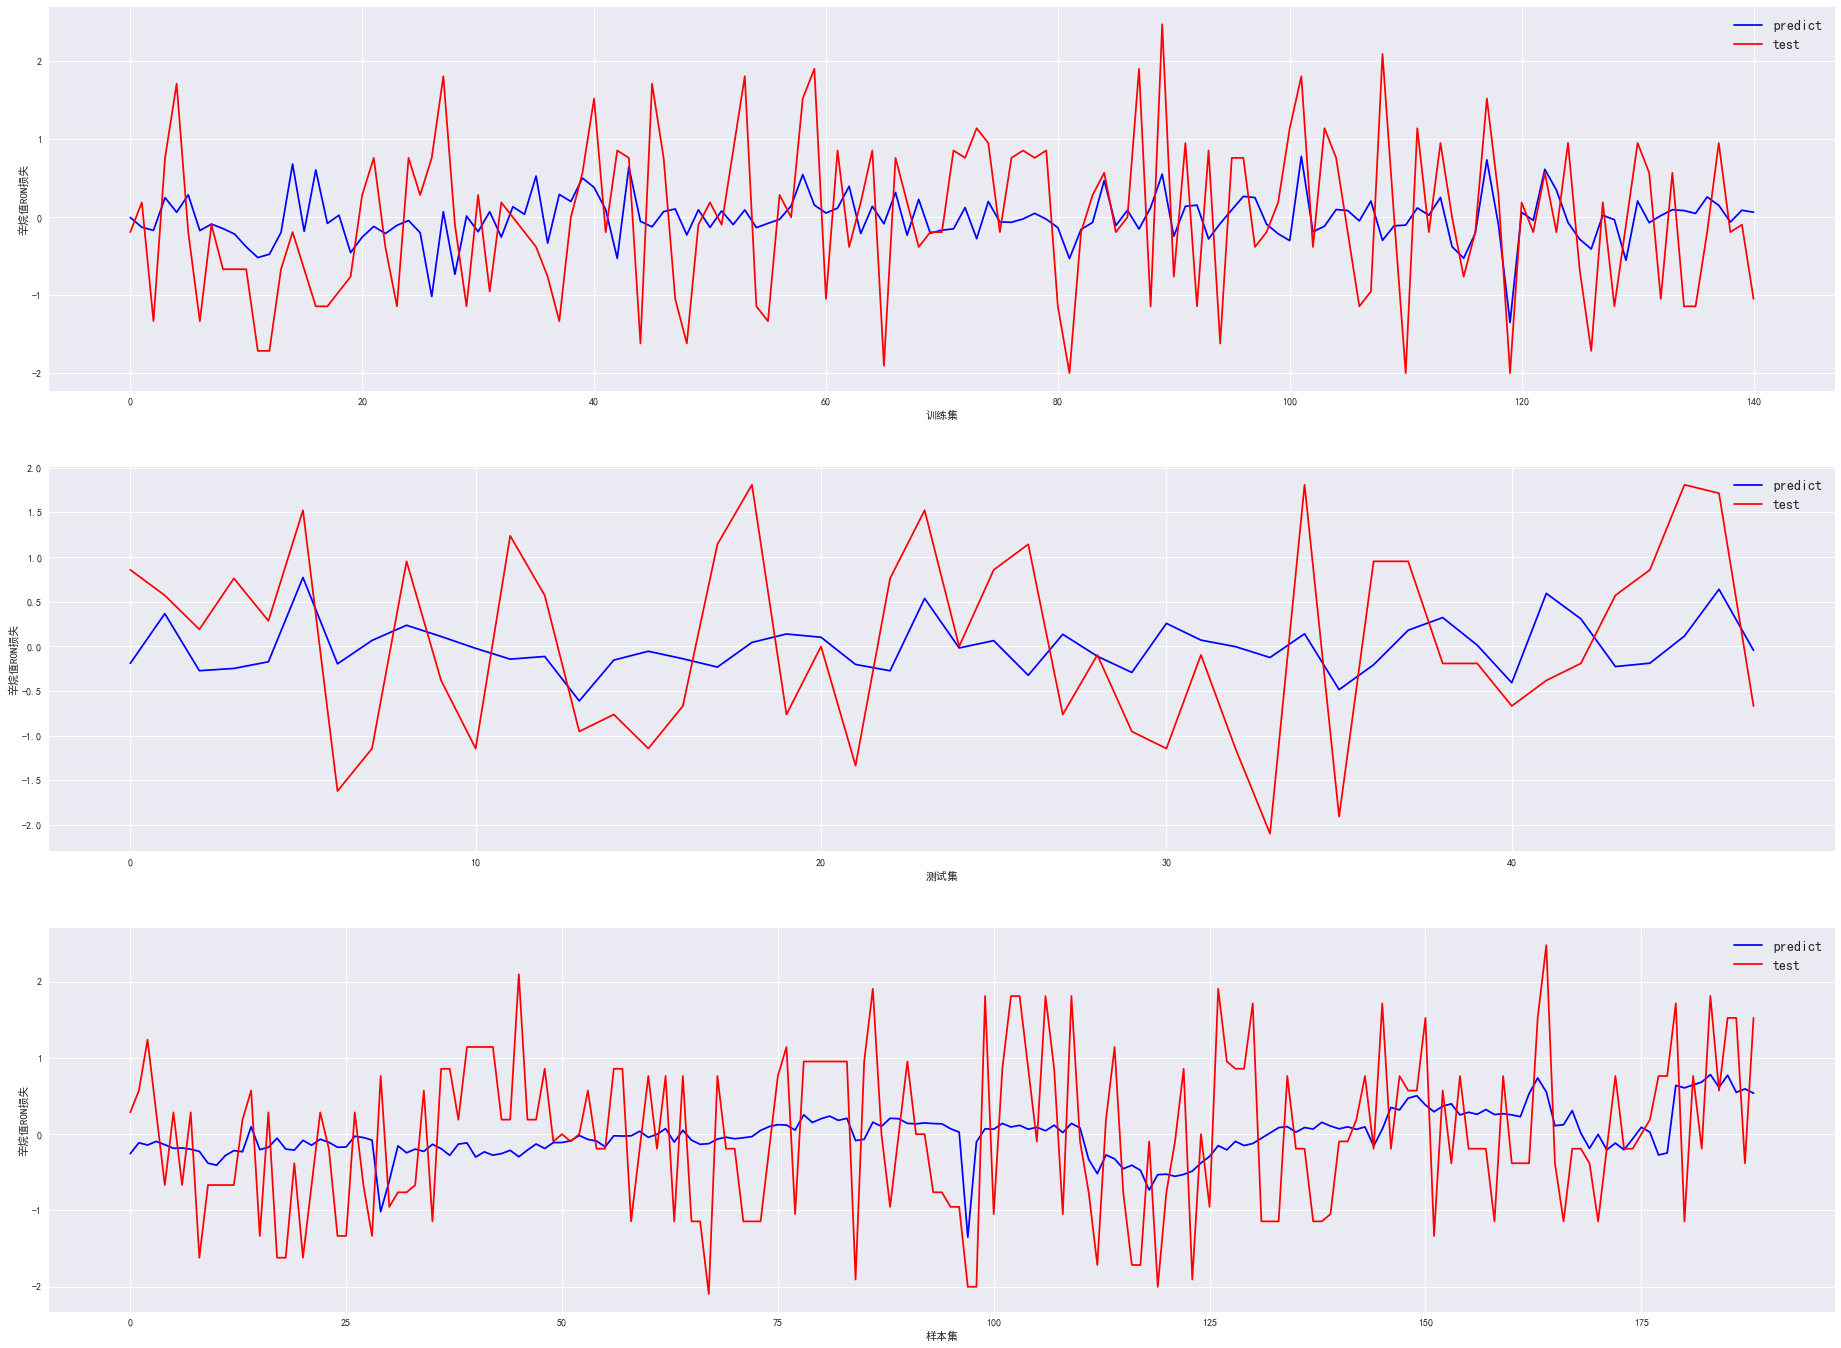

In [7]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

#### 对于 类别-2 进行线性回归建模 with Ridge

In [8]:
# 构建训练集和测试集 cluster 2nd
X = model_features_2nd
y = produc_features_2nd[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(87, 22)
y_train.shape=(87, 1)
X_test.shape=(30, 22)
y_test.shape=(30, 1)


In [9]:
model_2nd = Ridge(alpha=0.1)
model_2nd.fit(X_train, y_train)
y_train_pred = model_2nd.predict(X_train)
y_test_pred = model_2nd.predict(X_test)
y_pred = model_2nd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.517, test:0.821, whole:0.595
R^2 train:0.516, test:-0.039, whole:0.405


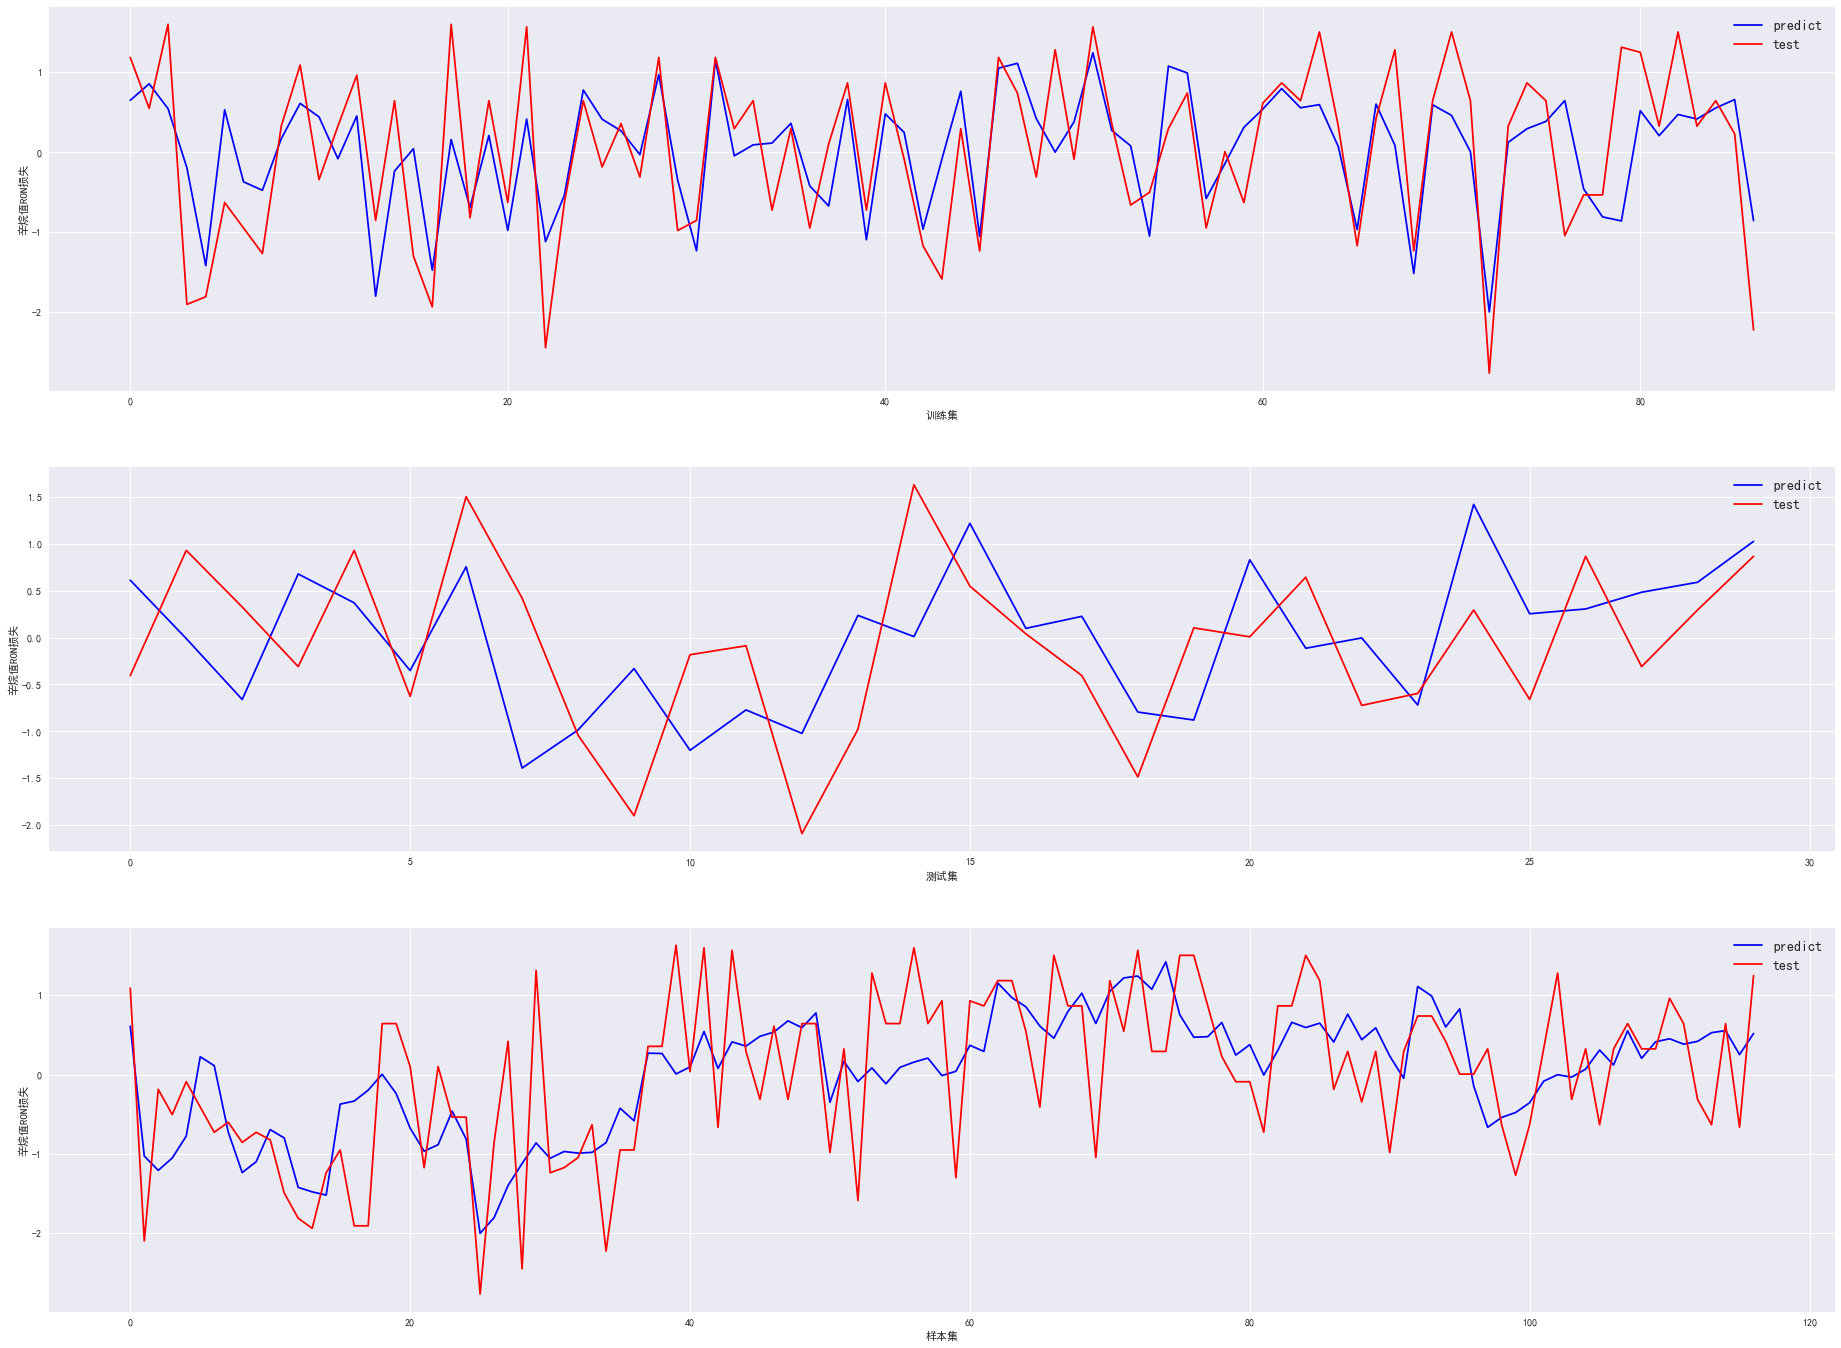

In [10]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类的模型的特征的并集

In [11]:
X = samples_data[list(set(model_features_1st.keys()).union(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(243, 27)
y_train.shape=(243, 1)
X_test.shape=(82, 27)
y_test.shape=(82, 1)


In [12]:
model_3rd = Ridge(alpha=0.1)
model_3rd.fit(X_train, y_train)
y_train_pred = model_3rd.predict(X_train)
y_test_pred = model_3rd.predict(X_test)
y_pred = model_3rd.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.038, test:0.051, whole:0.041
R^2 train:0.218, test:0.124, whole:0.192


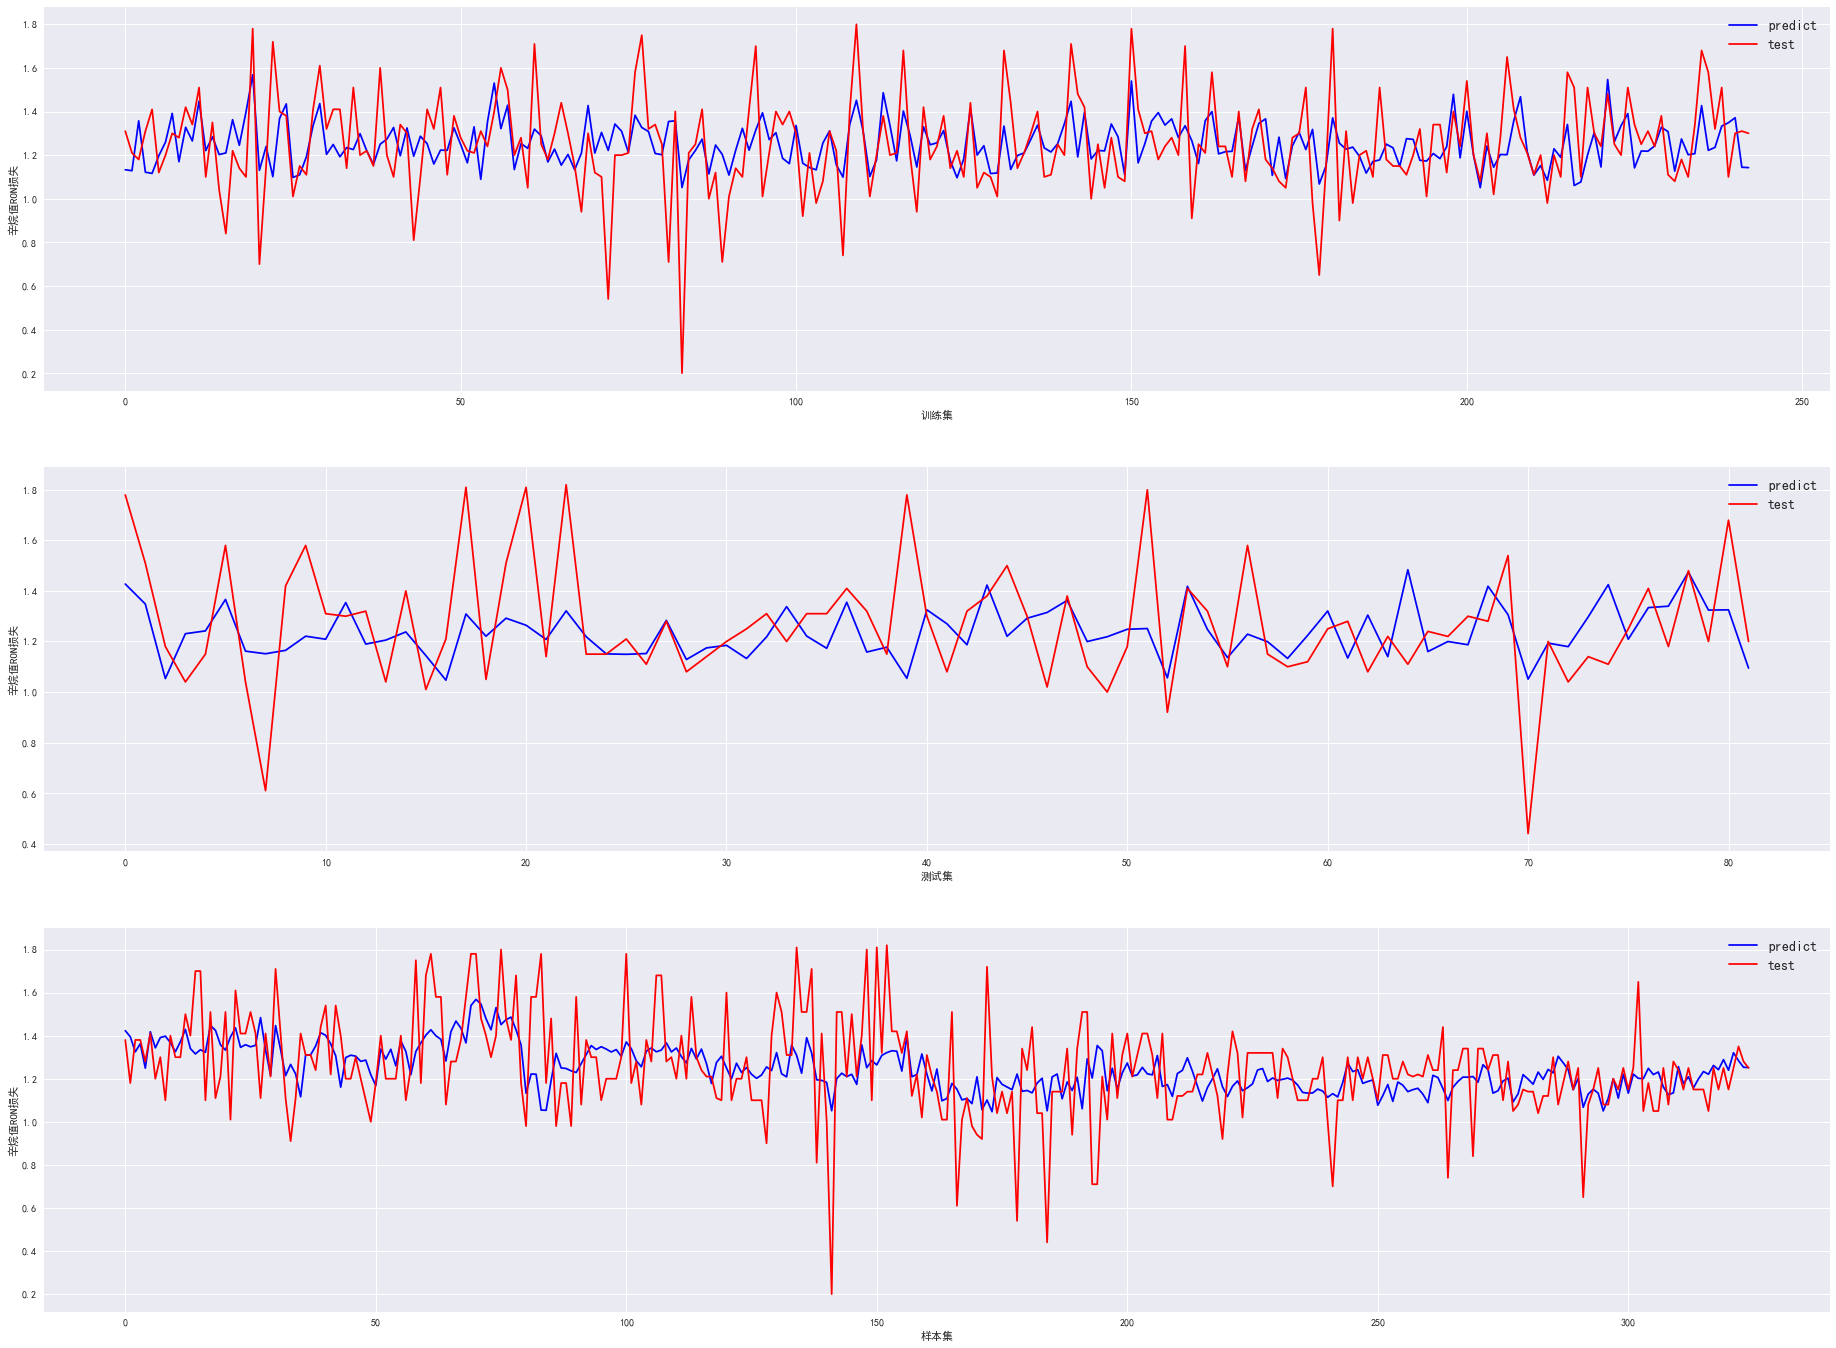

In [13]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()

## 选择各聚类线性模型的特征的交集

In [14]:
X = samples_data[list(set(model_features_1st.keys()).intersection(set(model_features_2nd.keys())))]
y = samples_data[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(243, 6)
y_train.shape=(243, 1)
X_test.shape=(82, 6)
y_test.shape=(82, 1)


In [16]:
model_4th = Ridge(alpha=0.1)
model_4th.fit(X_train, y_train)
y_train_pred = model_4th.predict(X_train)
y_test_pred = model_4th.predict(X_test)
y_pred = model_4th.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (metrics.r2_score(y_train, y_train_pred), metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y, y_pred)))

MSE train:0.048, test:0.037, whole:0.045
R^2 train:0.139, test:0.014, whole:0.119


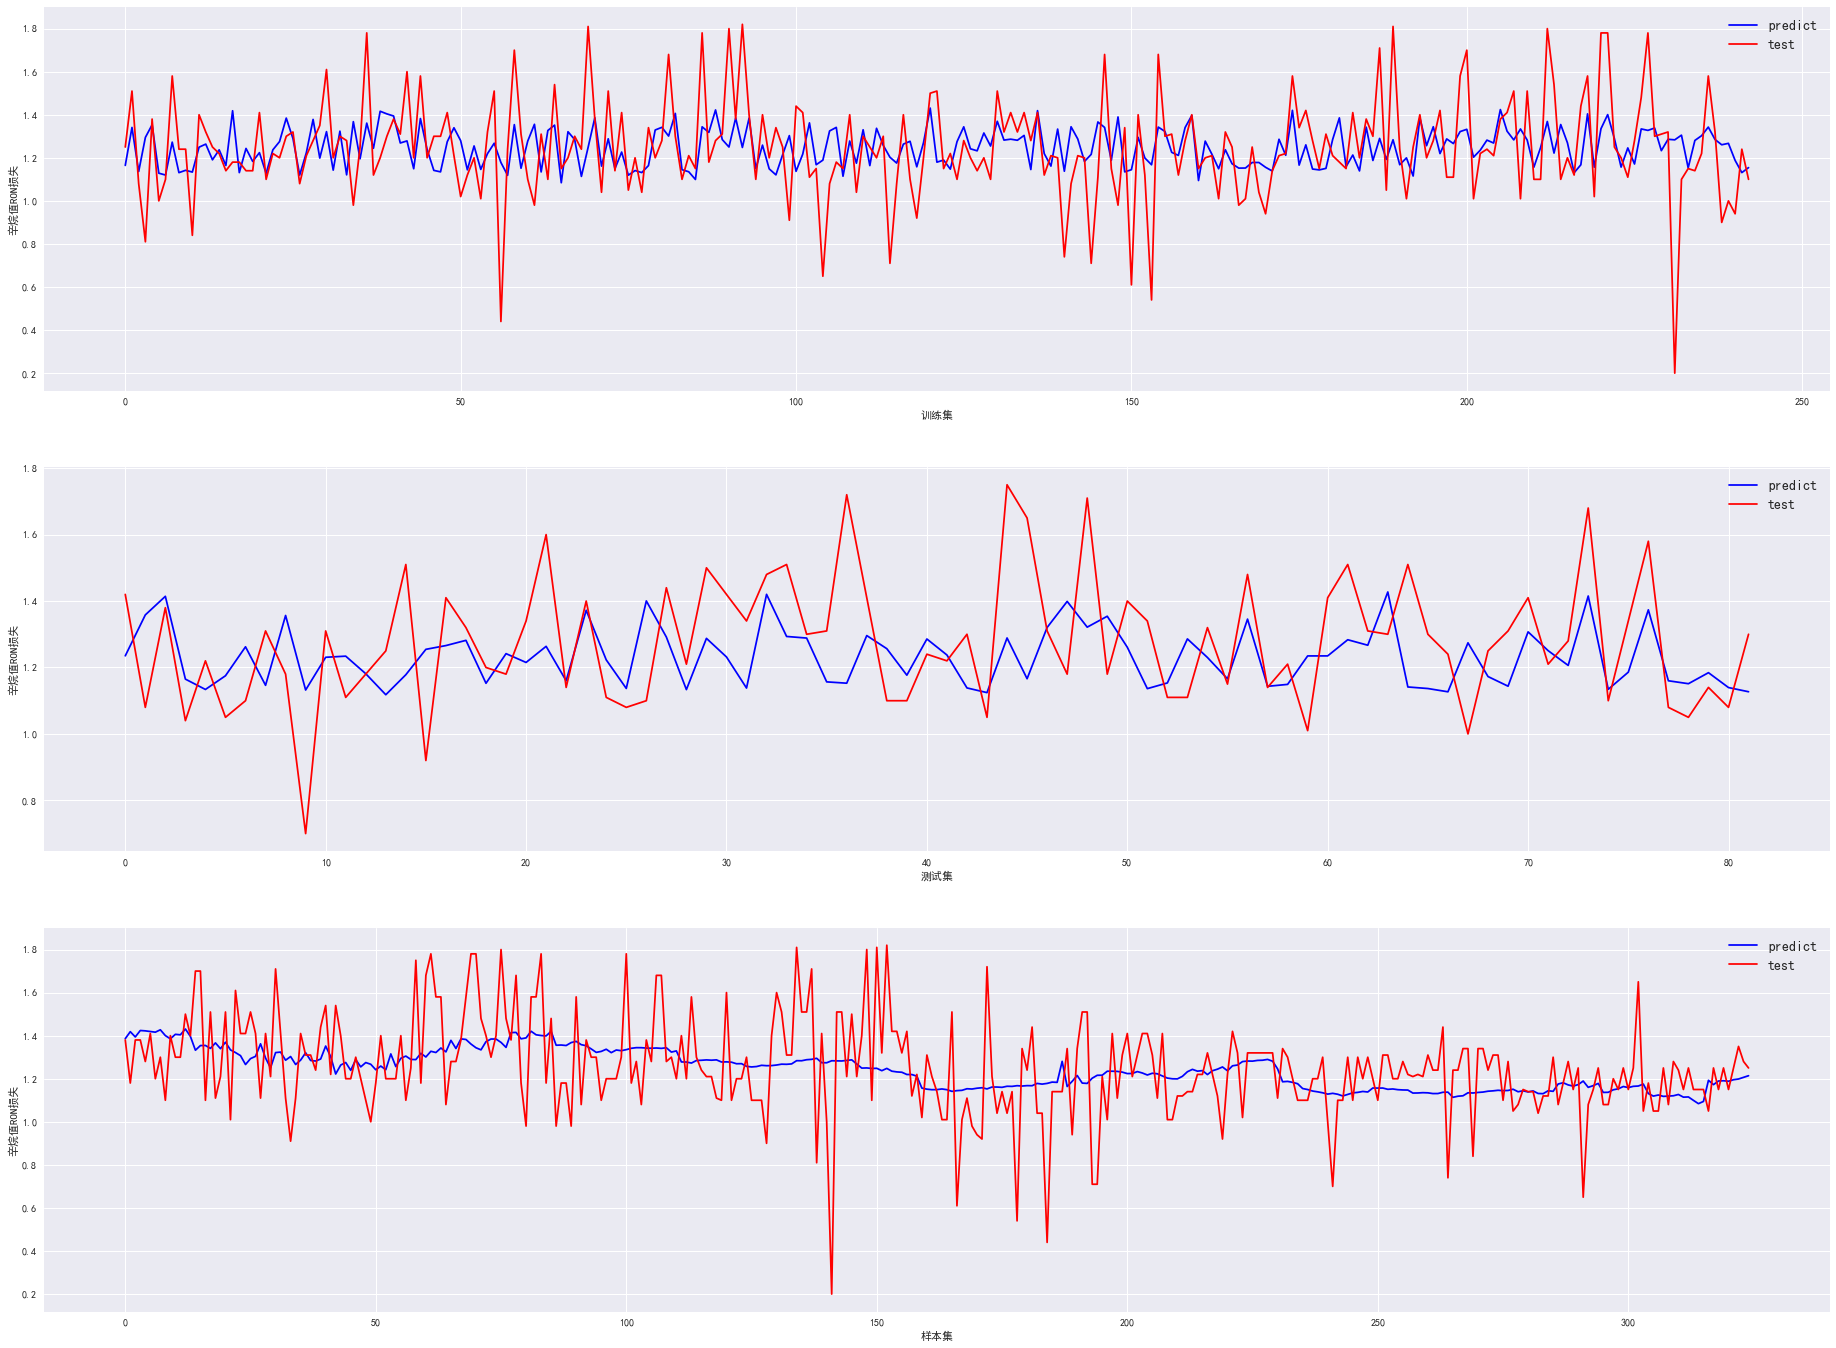

In [17]:
plt.figure(figsize = (32, 24))
plt.subplot(311)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(312)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(313)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right", prop={'size': 14})
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()